In [1]:
import os
import random
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms, datasets, models
from torch.utils.data import DataLoader
from PIL import Image
import matplotlib.pyplot as plt

In [5]:
# Define the class labels
classes= ["Powdery mildew", "Healthy", "Cotton Boll Rot", "Bacterial blight", "Aphids"]

# Initialize the ResNet-18 model
model_test = models.resnet18(pretrained=False)
model_test.fc = nn.Linear(model_test.fc.in_features, len(classes))
model_test.load_state_dict(torch.load("best_tuned_model_cotton_disease.pth"))
model_test.eval()
# # Load the pre-trained weights
# model.load_state_dict(torch.load("best_tuned_model_cotton_disease.pth"))
# model.eval()

# Define transformations for input images
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

# Loop over the folder of testing dataset
testing_folder = "C:\\Users\\RoopaGanesh\\Downloads\\Cotton plant disease-Validation\\Bacterial Blight edited"
for image_name in os.listdir(testing_folder):
    # Load the image
    image_path = os.path.join(testing_folder, image_name)
    image = Image.open(image_path).convert("RGB")

    # Apply transformations
    image = transform(image)

    # Add batch dimension
    image = image.unsqueeze(0)

    # Make prediction
    with torch.no_grad():
        output = model_test(image)

    # Get predicted class
    _, predicted_idx = torch.max(output, 1)
    predicted_class = classes[predicted_idx.item()]

    print(f"Image: {image_name}, Predicted Class: {predicted_class}")
#Huge errors encountered during validation

Image: 1.jpg, Predicted Class: Healthy
Image: 10.jpg, Predicted Class: Healthy
Image: 11.jpg, Predicted Class: Healthy
Image: 12.jpg, Predicted Class: Healthy
Image: 13.jpg, Predicted Class: Bacterial blight
Image: 14.jpg, Predicted Class: Healthy
Image: 15.jpg, Predicted Class: Healthy
Image: 16.jpg, Predicted Class: Healthy
Image: 17.jpg, Predicted Class: Healthy
Image: 18.jpg, Predicted Class: Cotton Boll Rot
Image: 19.jpg, Predicted Class: Healthy
Image: 2.jpg, Predicted Class: Healthy
Image: 20.jpg, Predicted Class: Healthy
Image: 21.jpg, Predicted Class: Healthy
Image: 22.jpg, Predicted Class: Healthy
Image: 23.jpg, Predicted Class: Healthy
Image: 24.jpg, Predicted Class: Healthy
Image: 25.jpg, Predicted Class: Healthy
Image: 26.jpg, Predicted Class: Powdery mildew
Image: 27.jpg, Predicted Class: Healthy
Image: 28.jpg, Predicted Class: Healthy
Image: 29.jpg, Predicted Class: Healthy
Image: 3.jpg, Predicted Class: Healthy
Image: 30.jpg, Predicted Class: Healthy
Image: 31.jpg, Pred

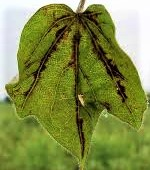

In [6]:
test_image_path = "C:\\Users\\RoopaGanesh\\Downloads\\Cotton plant disease-Validation\\Bacterial Blight edited\\11.jpg"
test_image = Image.open(test_image_path)
test_image